# Assessment 1: BugFinder
### Intro
This notebook is to be the record of completion for Assessment 1: Machine Learning.
### Scenario
Develop a model to be used with a hand-held hyperspectral camera system to identify harmful pests on containers and vessels entering the country, with the aim of preventing those pests from establishing themselves in this country and destroying native wildlife. This project will use a standard camera to develop a proof of concept for this system.

In [1]:
# Pre-setup
%pip install -Uqq ipywidgets
%pip install -Uqq fastbook
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.29 requires ipywidgets<8, but you have ipywidgets 8.1.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Setup - imports
from fastai.vision.widgets import *
from fastai.vision.all import *
import pandas as pd
import os
import shutil
import fnmatch

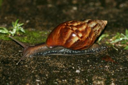

In [3]:
data = Image.open("Insects/Achatina fulica Bowdich/b589ecb6-505d-444f-8753-f4988c11615b.jpg")
data.to_thumb(128,128)

## Dataset Preprocessing & Organisation
#### Locating Dataset
I used Kaggle to research datasets containing images of a variety of different insects, and located two potentially suitable, pre-labelled data sets:
- https://www.kaggle.com/datasets/shameinew/insect-images-with-scientific-names
- https://www.kaggle.com/datasets/rtlmhjbn/ip02-dataset

After examining these large datasets, I chose to take a subset of the first dataset as a proof of concept to specialise in identifying pests of highest concern. The following code is importing this dataset for use in the next steps.

Trogoderma granarium Everts: 56
Solenopsis invicta Buren: 54
Lymantria dispar (L.): 54
Achatina fulica Bowdich: 54
Apis mellifera Linnaeus: 55


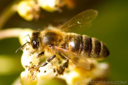

In [4]:
insect_types = ['Trogoderma granarium Everts', 'Solenopsis invicta Buren', 'Lymantria dispar (L.)', 'Achatina fulica Bowdich', 'Apis mellifera Linnaeus']
path = Path('Insects')
if not path.exists():
    path.mkdir()
# find/create subfolders for each insect type
bug_folders = []
for i, folder in enumerate(insect_types):
    bug_folders.append(path/folder)
    if not bug_folders[i].exists():
        os.makedirs(bug_folders[i])
# count images in each folder, verify files have been located
bug_counts = [0, 0, 0, 0, 0]
for i, name in enumerate(insect_types):
    bug_counts[i] = len(fnmatch.filter(os.listdir(bug_folders[i]), '*.*'))
    print(name + ": " + str(bug_counts[i]))
# show a bee to check images
test_bee = Image.open(bug_folders[4]/os.listdir(bug_folders[4])[0])
test_bee.to_thumb(128,128)

#### Preprocessing Dataset
The following code will take the pre-labelled dataset and correct the sizes of all images to a consistent size.

In [5]:
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=RandomResizedCrop(224, min_scale=0.5))
datablock = datablock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = datablock.dataloaders(path)

C:\Users\captoj\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)



### Dataset Organisation
The following code will split the dataset into a training folder, validation folder and testing folder, then output the number of images in the newly sorted folders

In [6]:
for i, bug in enumerate(insect_types):
    training_count = int(bug_counts[i] * 0.6)
    validation_count = int(bug_counts[i] * 0.2)
    training_dest = (path/'training'/insect_types[i])
    if not training_dest.exists():
      os.makedirs(training_dest)
    validation_dest = (path/'validation'/insect_types[i])
    if not validation_dest.exists():
      os.makedirs(validation_dest)
    test_dest = (path/'test'/insect_types[i])
    if not test_dest.exists():
      os.makedirs(test_dest)
    files = os.listdir(bug_folders[i])
    for j, image in enumerate(files):
      if j < training_count:
        shutil.copy(bug_folders[i]/image, training_dest)
      elif j < training_count + validation_count:
        shutil.copy(bug_folders[i]/image, validation_dest)
      elif j < len(files) - 3:
        shutil.copy(bug_folders[i]/image, test_dest)
    # count files in sorted folders and print results
    training_files = [[file] for file in os.listdir(training_dest)]
    validation_files = [[file] for file in os.listdir(validation_dest)]
    test_files = [[file] for file in os.listdir(test_dest)]
    print(bug + ' training files: ' + str(len(training_files)))
    print(bug + ' validation files: ' + str(len(validation_files)))
    print(bug + ' test files: ' + str(len(test_files)))

Trogoderma granarium Everts training files: 33
Trogoderma granarium Everts validation files: 11
Trogoderma granarium Everts test files: 9
Solenopsis invicta Buren training files: 32
Solenopsis invicta Buren validation files: 10
Solenopsis invicta Buren test files: 9
Lymantria dispar (L.) training files: 32
Lymantria dispar (L.) validation files: 10
Lymantria dispar (L.) test files: 9
Achatina fulica Bowdich training files: 32
Achatina fulica Bowdich validation files: 10
Achatina fulica Bowdich test files: 9
Apis mellifera Linnaeus training files: 33
Apis mellifera Linnaeus validation files: 11
Apis mellifera Linnaeus test files: 8


## Creating an ML Model:

The following code will create and train an image classification model based on the resnet18 pre-trained model as a base, as it is commonly used in industry due to being relatively quick to train for good accuracy. The parameters have been tweaked to be optimised for training quickly for demonstration purposes.

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.984210,0.385731,0.152381,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.497391,0.119839,0.057143,00:14
1,0.308150,0.059394,0.038095,00:14


## Model Scoring:

1. Use the trained model to predict pest species in a given set of images from the validation dataset.
2. Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall).

The following section will create a widget where images can be uploaded and the model will make a prediction on that image.

In [8]:
# Exporting model
learn.export()
path = Path()

In [ ]:
learn_inf = load_learner(path/'export.pkl')
output = widgets.Output()
prediction_label = widgets.Label()
run_button = widgets.Button(description='Classify')
def on_click_classify(change):
    image = PILImage.create(upload_button.data[-1])
    output.clear_output()
    with output: display(image.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(image)
    prediction_label.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

run_button.on_click(on_click_classify)
upload_button = widgets.FileUpload()
VBox([upload_button, run_button, output, prediction_label])

The following code displays a graph showing the confusion matrix: A way of displaying the accuracy of the model by showing how many times it has incorrectly classified inputs, and what it wrongly classified them as. This type of graph is ideal for identifying the 'weak points' in a model, or categories the model has difficulty distinguishing between.

C:\Users\captoj\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


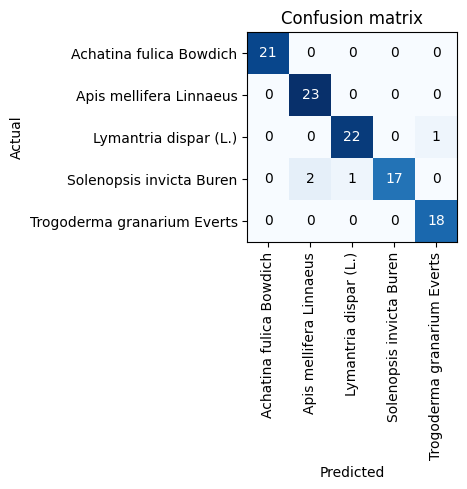

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Validation and Test Datasets:

1. Create a validation dataset that was not used during training to assess the model's generalization ability.
2. Ensure that the validation dataset contains images with varying conditions and perspectives.
3. Additionally, prepare a separate test dataset for final model evaluation.

## Model Performance Analysis:

1. Apply the trained model to the test dataset to evaluate its performance on previously unseen data.
2. Analyze the model's predictions, misclassifications, and potential areas of improvement.
3. Summarize the assessment of the model's capabilities and limitations.